# Analizando Datos con PyData

* Objetivos de la Lección.
* Algunos métodos sumamente útiles.
* Operaciones con más de una DataFrame.
* Estrategias para un proyectos de Análisis de Datos.

## Objetivos de la Lección

A diferencia de las lecciones pasadas, para esta ocasión dedicamos la mitad de la seción a trabajar con un conjunto de datos o archivos, y la otra mitad con otro. 

Los objetivos en general son similares, pero cuentan con dos objetivos diferentes.

* El primer conjunto se usará para revisar : pipelines, agrupaciones y merge.
* El segundo grupo para implementar dos etapas de la metodología CRISP-DM (Data Undestanding y Data Preparation).

## Algunos métodos sumamente útiles.

Todos los objetos en Pandas (Series o DataFrame) cuentan con diferentes métodos, la lista es considerablemente amplia. Un conjunto de ellas resultan sumemente importantes en el momento de procesar la informacion contenida en una Serie o un DataFrame:

* apply()
* applymap()
* transform()
* filter()
* aggregate() o agg()
* groupby()

El siguiente código muestra algunos ejemplos:



### Descripción de los datos que usaremos en éstos ejercicios

https://developers.google.com/machine-learning/crash-course/california-housing-data-description


In [1]:
#Se cargan los datos  

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/california_housing_train.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### apply()

El método aplica una función sobre toda una columa.

Se considera el problema de tener los valores de la variable **median_house_value** cuenta con valores muy grandes con respecto a la mayoría de los valores. Para explorar esto desde otra pespectiva, aplicamos la función **logaritmo** sobre la variable.

<AxesSubplot:title={'center':'Distribución'}, ylabel='Frequency'>

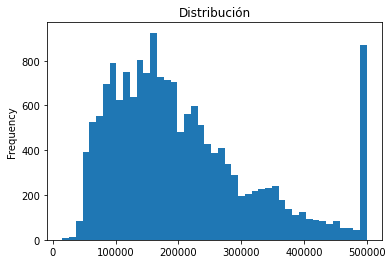

In [2]:
#Ejemplo del uso de la funcipon apply

#Datos originales
data.loc[:,'median_house_value'].plot.hist(bins=45,title='Distribución')


<AxesSubplot:title={'center':'Distribución'}, ylabel='Frequency'>

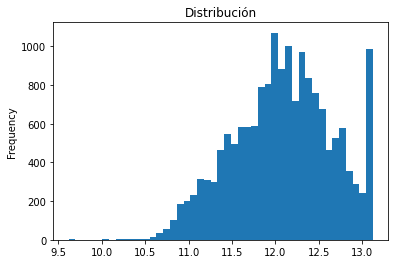

In [3]:
#Datos después de transformarlos
data.loc[:,'median_house_value'].apply(np.log).plot.hist(bins=45,title='Distribución')


### applymap()

El método aplica sobre cada valor de las columnas.

Suponemos el siguiente problema o detalle con los datos, las columnas **total_rooms** y 	**total_bedrooms** las consideramos que deben ser tratadas como valors enteros y no como flotantes. Así que aplicamos la operación a cada elemento.	

In [4]:
#Aplicación del método applymap

#Datos originales
data.loc[:,["total_rooms","total_bedrooms"]].head()

,total_rooms,total_bedrooms
0,5612.0,1283.0
1,7650.0,1901.0
2,720.0,174.0
3,1501.0,337.0
4,1454.0,326.0


In [5]:
#Datos después de aplicar applymap

data.loc[:,["total_rooms","total_bedrooms"]].applymap(lambda x: int(x)).head(30)



,total_rooms,total_bedrooms
0,5612,1283
1,7650,1901
2,720,174
3,1501,337
4,1454,326
5,1387,236
6,2907,680
7,812,168
8,4789,1175
9,1497,309


##  transform()


Este método aplica una funcion sobre el DataFrame, soporta no solo Dataframes sino también DataFrames provenientes de agrupaciones.

Como ejemplo, "normalizamos" los datos con la intención de dejar el valor de las variables **housing_median_age** y **median_income** con media 0 y varianza 1.

In [6]:
#Ejemplo de aplicación del método transform()

#Se aplica directo a dos columnas.
data.loc[:,['housing_median_age','median_income']].transform(lambda x:(x - x.mean()) / x.std())

,housing_median_age,median_income
0,-1.079639,-1.252506
1,-0.761850,-1.081451
2,-0.920744,-1.170071
3,-1.159087,-0.362590
4,-0.682402,-1.026424
...,...,...
16995,1.859916,-0.799975
16996,0.588757,-0.715705
16997,-0.920744,-0.446650
16998,-0.761850,-0.997758


En el siguiente ejemplo se aplica la normalización sobre las columnas agregadas.

In [7]:
data[['housing_median_age','median_income','median_house_value']]\
      .groupby('housing_median_age')\
      .agg('max')\
      .transform(lambda x:(x - x.mean()) / x.std())\
      .head(5)


,median_income,median_house_value
housing_median_age,,
1.0,-3.667378,-7.072428
2.0,-1.378784,0.138675
3.0,-0.739036,0.138675
4.0,0.182299,0.138675
5.0,-0.218503,0.138675


*Nota: en apariencia parace poco relevante el método anterior, pero se debe de considerar que un DataFrame después de alguna agrupación cambia su forma y puede dejar de ser 2-dimensional, en cierto sentido.*

## filter()

Este método te permite elegir columnas o filas.

El primer ejemplo es parecido a lo que uno puede hacer con el método *.loc()*, pero algunas operaciones u opciones para hacer esta selección de filas o columnas solo se tiene en este método.

El primer ejemplo solo elige dos columnas indicando el nombre.

In [8]:
# Aplicación del método filter

# Selección de dos columnas
data[['housing_median_age','total_rooms']].head()

,housing_median_age,total_rooms
0,15.0,5612.0
1,19.0,7650.0
2,17.0,720.0
3,14.0,1501.0
4,20.0,1454.0


In [9]:
# Selección de las columnas solo indicando parte de la palabra del nombre
data.filter(like='h',axis=1).head()

,housing_median_age,households,median_house_value
0,15.0,472.0,66900.0
1,19.0,463.0,80100.0
2,17.0,117.0,85700.0
3,14.0,226.0,73400.0
4,20.0,262.0,65500.0


ver mas ejemplos : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

### aggregation or agg

Este método como su nombre lo dice, "agrega" los datos. Con esto se indica que se aplica una operación o función y se obtiene un resultado.

En el siguiente ejemplo se usa el método para conocer aspectos estádisticos de dos variables.

In [10]:
#Se aplica el método agg o aggregation

#Se aplica sobre dos columnas.
data[['median_income','median_house_value']].agg(['min','max','mean','median','var'])

,median_income,median_house_value
min,0.499900,1.499900e+04
max,15.000100,5.000010e+05
mean,3.883578,2.073009e+05
median,3.544600,1.804000e+05
var,3.641061,1.345223e+10


In [11]:
#Se aplica despues de una agragación
data[['housing_median_age','median_income','median_house_value']]\
      .groupby('housing_median_age')\
      .agg(['min','max','mean','median','var'])\
      .head()


median_income                                        \
                             min      max      mean   median       var   
housing_median_age                                                       
1.0                       4.2500   5.2636  4.756800  4.75680  0.513692   
2.0                       1.9667  10.1531  5.074237  4.63360  3.231824   
3.0                       2.1187  11.5199  5.572013  5.40415  3.767892   
4.0                       0.5360  13.4883  5.196055  4.94320  3.848797   
5.0                       0.7526  12.6320  4.732460  4.35980  3.824122   

                   median_house_value                                     \
                                  min       max           mean    median   
housing_median_age                                                         
1.0                          189200.0  191300.0  190250.000000  190250.0   
2.0                           47500.0  500001.0  229438.836735  191700.0   
3.0                           83200.0  500001.0  239450.043478  216400.0   
4.0                           42500.0  500001.0  230054.105590  198900.0   
5.0                           50000.0  500001.0  211035.708543  176900.0   

                                  
                             var  
housing_median_age                
1.0                 2.205000e+06  
2.0                 1.393094e+10  
3.0                 1.184227e+10  
4.0                 1.151705e+10  
5.0                 1.205155e+10

En general siempre se usa después de una agregación.

### groupby()

El método agrupa o agrega los datos según se indique las variables. Pero el DataFrame que se obtiene como resultado soporta diferentes métodos.

El siguiente ejemplo es un estandar, se agragan dos columnas y se aplica alguna función con el método *agg*.

In [12]:
#Aplicación de GrupyBy sobre el DataFrame.

#Aplicación sencilla.
data[['housing_median_age','median_income','median_house_value']]\
      .groupby('housing_median_age')\
      .agg(['min','max','mean'])\
      .head()     

median_income                    median_house_value  \
                             min      max      mean                min   
housing_median_age                                                       
1.0                       4.2500   5.2636  4.756800           189200.0   
2.0                       1.9667  10.1531  5.074237            47500.0   
3.0                       2.1187  11.5199  5.572013            83200.0   
4.0                       0.5360  13.4883  5.196055            42500.0   
5.0                       0.7526  12.6320  4.732460            50000.0   

                                             
                         max           mean  
housing_median_age                           
1.0                 191300.0  190250.000000  
2.0                 500001.0  229438.836735  
3.0                 500001.0  239450.043478  
4.0                 500001.0  230054.105590  
5.0                 500001.0  211035.708543

In [13]:
#Aplicamos GrupyBy y operamos sobre el DF resultado.

GrupyBy=data.groupby('housing_median_age')

In [14]:
GrupyBy
#type(data)

In [15]:
#Se eligen dos columnas y se visualizan las estadísticas básicas
GrupyBy[['median_income','median_house_value']].describe()

median_income                                        \
                           count      mean       std     min       25%   
housing_median_age                                                       
1.0                          2.0  4.756800  0.716723  4.2500  4.503400   
2.0                         49.0  5.074237  1.797727  1.9667  3.944300   
3.0                         46.0  5.572013  1.941106  2.1187  4.230150   
4.0                        161.0  5.196055  1.961835  0.5360  3.935600   
5.0                        199.0  4.732460  1.955536  0.7526  3.504700   
6.0                        129.0  4.463901  1.902570  0.8198  3.194400   
7.0                        151.0  4.368441  1.923437  1.2667  3.205300   
8.0                        178.0  4.412988  2.080652  0.8131  3.072975   
9.0                        172.0  4.357513  1.760464  0.8952  3.125000   
10.0                       226.0  4.126004  2.038379  0.4999  2.701600   
11.0                       208.0  4.029663  1.914244  0.9227  2.870175   
12.0                       192.0  4.003208  1.723239  0.8130  2.814025   
13.0                       249.0  4.145092  1.655430  0.8288  2.950000   
14.0                       347.0  4.148454  1.851944  1.1301  2.859100   
15.0                       416.0  4.003953  1.731653  0.4999  2.672075   
16.0                       635.0  4.288458  1.816832  0.4999  2.891400   
17.0                       576.0  3.929201  1.903437  0.6825  2.524875   
18.0                       478.0  3.954591  1.940543  0.8246  2.519325   
19.0                       412.0  3.833244  1.923648  0.7025  2.584575   
20.0                       383.0  3.749984  1.887071  0.8894  2.418900   
21.0                       373.0  3.870417  1.860806  0.8571  2.552100   
22.0                       323.0  3.941335  1.922406  0.7473  2.594900   
23.0                       382.0  3.963371  1.994495  0.4999  2.501300   
24.0                       389.0  3.921026  1.974018  0.6433  2.520000   
25.0                       461.0  4.135890  1.959227  0.7990  2.699800   
26.0                       503.0  4.071895  1.927704  0.5360  2.642500   
27.0                       397.0  3.859375  1.942717  0.8543  2.572700   
28.0                       400.0  3.813176  2.010649  0.4999  2.460475   
29.0                       374.0  3.633556  1.842911  0.7069  2.441275   
30.0                       384.0  3.580732  1.710884  0.7007  2.363350   
31.0                       384.0  3.619995  1.879931  0.7684  2.398225   
32.0                       458.0  3.800399  1.981367  0.8984  2.566200   
33.0                       513.0  3.862161  1.729368  0.5360  2.633300   
34.0                       567.0  3.959488  1.846699  0.8907  2.684900   
35.0                       692.0  3.909391  1.600449  0.7075  2.716550   
36.0                       715.0  3.973530  1.746587  0.4999  2.800450   
37.0                       437.0  3.684131  1.726851  0.6831  2.486600   
38.0                       318.0  3.463225  1.788845  0.7683  2.286125   
39.0                       302.0  3.395865  1.716687  0.7160  2.185250   
40.0                       249.0  3.432734  1.928014  0.9234  2.177100   
41.0                       232.0  3.149125  1.416708  0.9782  2.122675   
42.0                       308.0  3.447088  1.939110  0.8991  2.290375   
43.0                       286.0  3.238897  1.769055  0.4999  2.070500   
44.0                       296.0  3.507043  1.673430  1.1576  2.292300   
45.0                       235.0  3.739467  1.681080  0.9337  2.662000   
46.0                       196.0  3.357832  2.017507  0.4999  2.219950   
47.0                       175.0  3.278638  1.508880  1.1868  2.203700   
48.0                       135.0  3.526261  2.163493  0.8024  2.277100   
49.0                       111.0  3.547657  1.691369  0.7068  2.463700   
50.0                       112.0  3.472372  2.109475  1.2041  2.216525   
51.0                        32.0  3.670503  2.059757  1.2852  2.172300   
52.0                   

In [16]:
data[['median_income','median_house_value']].describe()

,median_income,median_house_value
count,17000.000000,17000.000000
mean,3.883578,207300.912353
std,1.908157,115983.764387
min,0.499900,14999.000000
25%,2.566375,119400.000000
50%,3.544600,180400.000000
75%,4.767000,265000.000000
max,15.000100,500001.000000


Breve Explicación: cuando agrupamos los datos estamos aplicando alguna operación o función sobre el DataFrame para a cada una de las categorias. Por ejemplo, la tabla que se obtiene con el código del ejemplo:

~~~python
GrupyBy=data.groupby('housing_median_age')
GrupyBy[['median_income','median_house_value']].describe()
~~~

Podría ser recuperada línea por línea haciendo el siguiente código y solo ir cambiando la condición 
~~~python 

data.housing_median_age==ALGUN VALOR

~~~

In [17]:
data[data.housing_median_age==7][['median_income','median_house_value']].describe()

,median_income,median_house_value
count,151.000000,151.000000
mean,4.368441,188445.059603
std,1.923437,97741.450307
min,1.266700,56200.000000
25%,3.205300,121950.000000
50%,3.946400,162200.000000
75%,5.074650,219950.000000
max,13.809300,500001.000000


El código anterios muestra la informacion estadística respetando las agrupaciones sobre los valores de la variable **housing_median_age**. 

El método groupby() cuenta con algunos métodos que se pueden usar sobre el DataFrames que se obtiene.

Los siguientes códigos son ejemplos de funciones calculadas directamente sobre el GroupBy.

In [18]:
GrupyBy.first()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,,,,,,,,
1.0,-120.93,37.65,2254.0,328.0,402.0,112.0,4.2500,189200.0
2.0,-115.80,33.26,96.0,18.0,30.0,16.0,5.3374,47500.0
3.0,-115.60,32.87,1629.0,317.0,1005.0,312.0,4.1293,83200.0
4.0,-116.76,34.14,42.0,10.0,9.0,3.0,0.5360,42500.0
5.0,-115.55,32.78,2652.0,606.0,1767.0,536.0,2.8025,84300.0
6.0,-115.52,32.67,2804.0,581.0,2807.0,594.0,2.0625,67700.0
7.0,-116.31,33.66,4497.0,831.0,2248.0,713.0,3.6354,98000.0
8.0,-115.59,32.79,2183.0,307.0,1000.0,287.0,6.3814,159900.0
9.0,-116.22,33.70,3861.0,849.0,825.0,401.0,3.2833,124700.0


In [19]:
GrupyBy.max()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,,,,,,,,
1.0,-120.93,38.23,2254.0,343.0,872.0,268.0,5.2636,191300.0
2.0,-115.80,40.58,21897.0,3513.0,8652.0,2873.0,10.1531,500001.0
3.0,-115.60,38.77,21060.0,3559.0,9623.0,3112.0,11.5199,500001.0
4.0,-116.76,39.00,37937.0,5471.0,16122.0,5189.0,13.4883,500001.0
5.0,-115.55,40.60,25187.0,4386.0,11956.0,3886.0,12.6320,500001.0
6.0,-115.52,38.73,16431.0,2640.0,8222.0,2553.0,13.0502,500001.0
7.0,-116.31,40.60,28258.0,4407.0,15037.0,4072.0,13.8093,500001.0
8.0,-115.59,40.61,32054.0,5290.0,15507.0,5050.0,14.9009,500001.0
9.0,-116.22,40.62,30405.0,4095.0,12873.0,3931.0,10.8289,500001.0


Para conocer los métodos que son aplicables al DataFrame después de un GroupBy(), se puede revisar la documentación de la api de Pandas:

[API Pandas](https://pandas.pydata.org/pandas-docs/stable/api.html)